In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sympy import *

<a href = "http://pubs.sciepub.com/ces/6/1/1/index.html">Articulo</a>

# Reactores de flujo pistón ideales

$E(t) ≈ {\frac{1}{2t}} * \sqrt{\frac{Pe}{π}} * e^{\left[ \frac{-Pe \left( 1 - \frac{t}{\bar t} \right)^2}{4 * \frac{t}{\bar t}} \right] }$ 

$ \sigma^{2}(t) = \left( \frac{2}{Pe} + \frac{8}{Pe^2} \right) * \bar t^{2}$



Si $1/P_e = 0$, el reactor se comporta como un RFP ideal

$
\sigma^2 = \int_{0}^{\infty} \left(t - \bar t \right)^{2} E(t) dt
$

$
E(t) = \frac{C(t)}{\int_{0}^{+ \infty} C(t) dt}
$

$
F(t) = \int_{0}^{\infty} E(t)dt
$

$
\bar t = \int_{0}^{\infty} t * E(t)dt
$

In [2]:
t = np.linspace(0,12,12)
C = np.array([0,0,0.1,1,1.5,2,1.4,1.1,0.1,0,0,0])

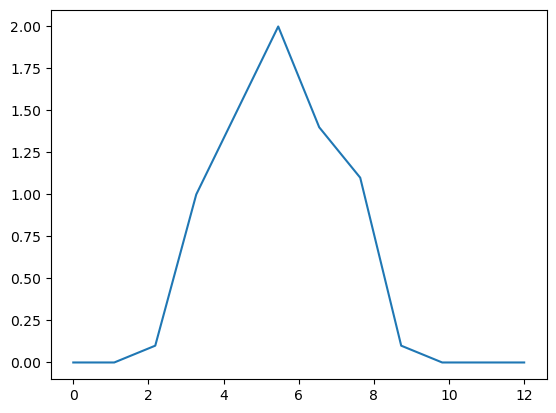

In [3]:
plt.plot(t,C)

In [4]:
dt = [0]
for i in range(11):
    dt.append(t[i+1]-t[i])
dt

[0,
 1.0909090909090908,
 1.0909090909090908,
 1.0909090909090908,
 1.0909090909090908,
 1.0909090909090908,
 1.0909090909090908,
 1.0909090909090908,
 1.0909090909090908,
 1.09090909090909,
 1.0909090909090917,
 1.0909090909090917]

In [5]:
Et = C/(C*dt).sum()

In [6]:
Et

array([0.        , 0.        , 0.01273148, 0.12731481, 0.19097222,
       0.25462963, 0.17824074, 0.1400463 , 0.01273148, 0.        ,
       0.        , 0.        ])

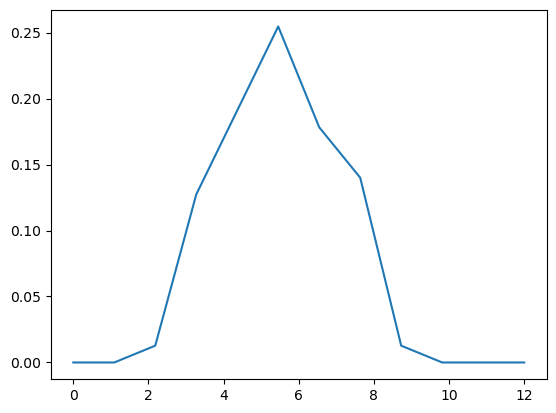

In [7]:
plt.plot(t,Et)

In [8]:
Ft = []
for i in range(12):
    Ft.append((Et[0:i]*dt[0:i]).sum())
Ft

[0.0,
 0.0,
 0.0,
 0.013888888888888888,
 0.1527777777777778,
 0.3611111111111111,
 0.6388888888888888,
 0.8333333333333333,
 0.986111111111111,
 0.9999999999999999,
 0.9999999999999999,
 0.9999999999999999]

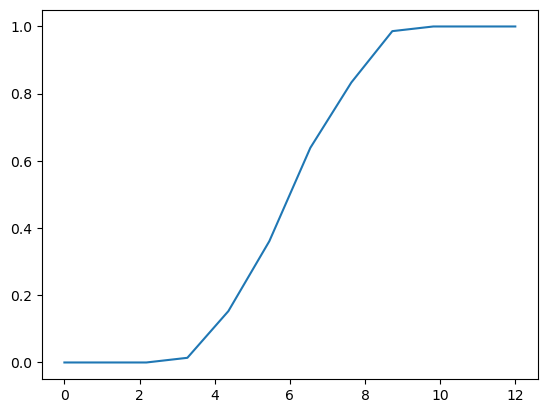

In [9]:
plt.plot(t,Ft)

In [10]:
trh = (t*Et*dt).sum()
trh

5.469696969696969

Text(6, 0.2, 'Tiempo de retención\nHidráulico')

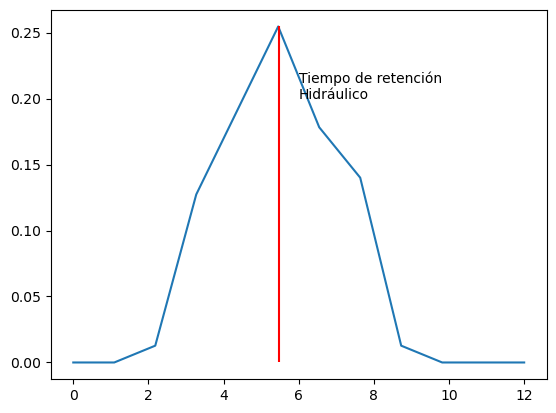

In [11]:
plt.plot(t,Et)
plt.vlines(trh,Et.min(),Et.max(), color="r")
plt.annotate("Tiempo de retención\nHidráulico", (6,0.20))

In [12]:
Varianza = (Et*dt*(t-trh)**2).sum()
Varianza

2.16505968778696

Text(6, 0.2, 'Tiempo de retención\nHidráulico')

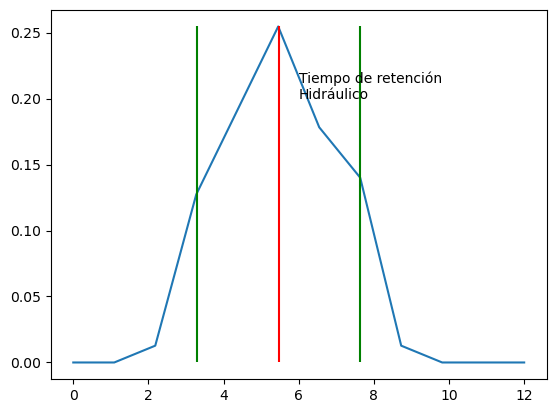

In [13]:
plt.plot(t,Et)
plt.vlines(trh,Et.min(),Et.max(), color="r")
plt.vlines(trh-Varianza,Et.min(),Et.max(), color="g")
plt.vlines(trh+Varianza,Et.min(),Et.max(), color="g")
plt.annotate("Tiempo de retención\nHidráulico", (6,0.20))

# Número de Pe

In [14]:
def Pe(sigmaReal, tprom, PeVali, PeValf, N):
    Pe = np.linspace(PeVali,PeValf,N)
    Sigma = ((2/Pe) + (8/(Pe)**2))*tprom**2
    plt.plot(Sigma,Pe)
    plt.xlabel("$\sigma^2$")
    plt.ylabel("Pe")
    plt.vlines(sigmaReal, Pe.min(), Pe.max(), color="green")
    plt.show()

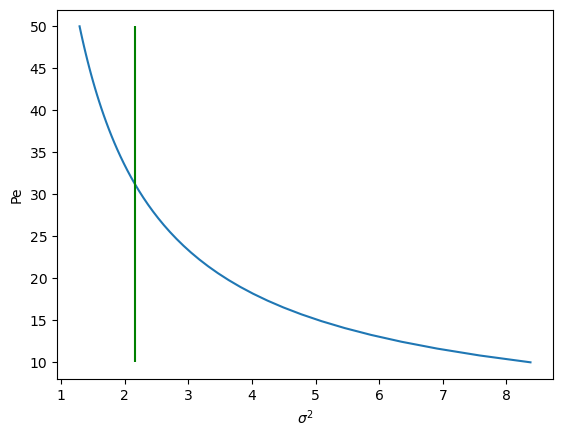

In [15]:
Pe(Varianza, trh, 10, 50, 50)

In [19]:
def Et_f(t,trh,peMin,peMax,Npe):
    pe = np.linspace(peMin,peMax,Npe)
    for i in range(Npe):
        num = -pe[i] *(1- (t/trh))**2
        den= 4*(t/trh)
        Et= (1/(2*t)) * np.sqrt(pe[i]/np.pi) * np.exp(num/den)
        plt.plot(t,Et, label=np.round(1/pe[i],2))
        plt.xlabel("tiempo")
        plt.ylabel("Et")
        plt.legend(title="1/Pe")

C:\Users\valiz\AppData\Local\Temp\ipykernel_12760\2235141156.py:6: RuntimeWarning: divide by zero encountered in divide
  Et= (1/(2*t)) * np.sqrt(pe[i]/np.pi) * np.exp(num/den)
C:\Users\valiz\AppData\Local\Temp\ipykernel_12760\2235141156.py:6: RuntimeWarning: invalid value encountered in multiply
  Et= (1/(2*t)) * np.sqrt(pe[i]/np.pi) * np.exp(num/den)


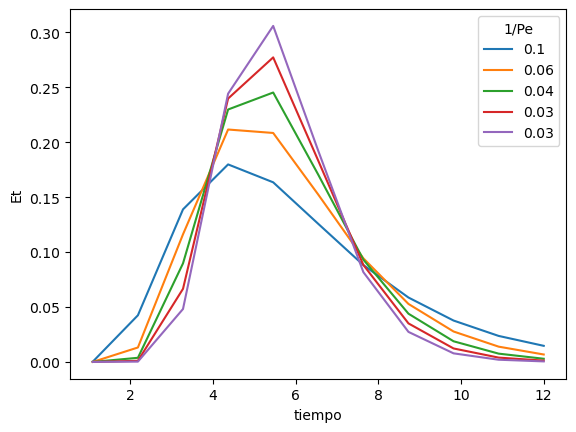

In [20]:
Et_f(t,trh,10,35,5)

# Reactores completamente mezclados ideales

## Cuando $n$ es un entero

$E(t) = \frac{1}{\bar t} * \frac{n^n}{(n-1)!} * \left( \frac{t}{\bar t} \right)^{2} * e^{\frac{-nt}{\bar t}}$

## Cuando $n$ no es un entero

$E(t) = \frac{1}{\bar t} * \frac{n^n}{Γ(n)} * \left( \frac{t}{\bar t} \right)^{2} * e^{\frac{-nt}{\bar t}}$

$\Gamma (n) \approx e^{n} n^{\left( n - \frac{1}{2} \right)} \sqrt{2 \pi} \left( 1 + \frac{1}{12n} + \frac{1}{288n^2} - \frac{139}{51840n^3} - \frac{571}{2488320n^4} \right)$

## Si $n$ supera los 25 reactores asumir como flujo piston, para ello tenga en cuenta:

$Pe = 2n-1$

$\sigma^{2} (t) = \frac{\bar t^2}{n}$

In [21]:
t2 = np.array([0, 2, 4, 6, 8, 10, 12, 14, 16, 18, 20, 22, 24]) #min
C2 = np.array([0, 1, 4, 7, 9, 8,  5,  2,  1.5, 1, 0.6, 0.2, 0]) #g/min